In [172]:
%pylab inline
import os
import fitsio
import matplotlib
import numpy as np
#important constant
C_LIGHT=2.99792458e8        # m/s
GNEWTON=6.67428e-11         # m^3/kg/s^2
KG_PER_SUN=1.98892e30       # kg/M_solar
M_PER_PARSEC=3.08568025e16  # m/pc

Populating the interactive namespace from numpy and matplotlib


# HSC S16A XMM
## Redshift

In [24]:
tractList  =   np.load('datDir/dr1FieldTract.npy',allow_pickle=True).item()['XMM']
poz_bins   =   fitsio.read('datDir/S16A_pz_pdf/mlz/target_wide_s16a_wide12h_9832.0.P.fits',ext=2)['BINS']
slide_bins=np.arange(0.05,2.1,0.05)
zblist=(slide_bins[:-1]+slide_bins[1:])/2.
nbins=len(slide_bins)-1

In [49]:
ntract=0
pdfStack=   np.zeros((nbins,len(poz_bins)))
numStack=   np.zeros(nbins)
for tn in tractList:
    pfn='datDir/S16AStandardCalibrated/tract/%s_pofz.fits' %tn.split('.')[0]
    cfn='datDir/S16AStandardCalibrated/tract/%s' %tn
    if not os.path.isfile(pfn):
        continue
    cdata=fitsio.read(cfn)
    pdata=fitsio.read(pfn)['PDF']
    assert len(pdata)==len(cdata)
    zBest=cdata['mlz_photoz_best']
    for ip in range(nbins):
        mask    =   (zBest>slide_bins[ip])&(zBest<slide_bins[ip+1])
        dataMask=   pdata[mask]
        outData =   np.sum(dataMask,axis=0)
        pdfStack[ip]+=   outData
        numStack[ip]+=  np.sum(mask)
pdfAve=   pdfStack/numStack[:,None]

Text(0, 0.5, 'prob')

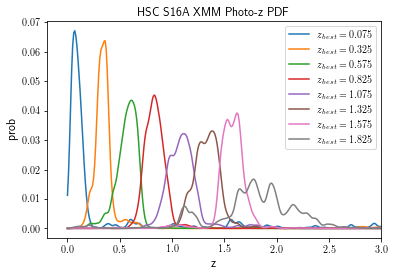

In [50]:
for pdf,zb in zip(pdfAve[0::5],zblist[0::5]):
    plt.plot(poz_bins,pdf,label=r'$z_{best}=%.3f$' %zb)
plt.legend()
plt.xlim(-0.2,3)
plt.title('HSC S16A XMM Photo-z PDF',fontsize=12)
plt.xlabel('z',fontsize=12)
plt.ylabel('prob',fontsize=12)

Text(0, 0.5, 'prob')

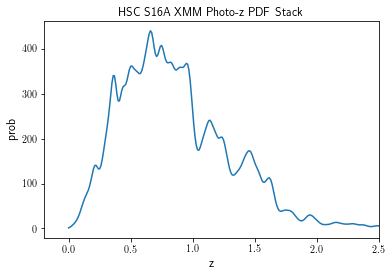

In [65]:
pdfA=np.average(pdfStack,axis=0)
plt.plot(poz_bins,pdfA)
plt.xlim(-0.2,2.5)
plt.title('HSC S16A XMM Photo-z PDF Stack',fontsize=12)
plt.xlabel('z',fontsize=12)
plt.ylabel('prob',fontsize=12)